## <center><font color='orange'>PROJECT ON PREDICTING WATER POTABILITY</font>

### Importing the libraries

In [1]:
#linear algebra
import numpy as np

# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer
from sklearn.metrics import classification_report, accuracy_score
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn import tree

#miscellaneous
import warnings
warnings.filterwarnings("ignore")

# <center><font color='VIOLET'>DATA EXPLORATION</font>

In [ ]:
#Reading a csv file
#df=pd.read_csv(r"C:\Users\Charu Goyal\Desktop\Dataset-SL\water_potability.csv")
df=pd.read_csv(r"D:\MACHINE_Learning_water_potability\water_potabilitydata.csv")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


The training-set has 3276 examples and 8 features + the target variable (potability). 8 of the features are floats and 1 is integer. We have listed the features with a short description:

<table>
    <tr>
        <th>Features</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>ph</td>
        <td>pH of 1. water (0 to 14)</td>
    </tr>
    <tr>
        <td>Hardness</td>
        <td>Capacity of water to precipitate soap in mg/L</td>
    </tr>
    <tr>
        <td>Solids</td>
        <td>Total dissolved solids in ppm</td>
    </tr>
    <tr>
        <td>Chloramines</td>
        <td>Amount of Chloramines in ppm</td>
    </tr>     
    <tr>
        <td>Sulfate</td>
        <td>Amount of Sulfates dissolved in mg/L</td>
    </tr>   
    <tr>
        <td>Conductivity</td>
        <td>Electrical conductivity of water in μS/cm</td>
    </tr>      
    <tr>
        <td>Organic_carbon</td>
        <td>Amount of organic carbon in ppm</td>
    </tr> 
    <tr>
        <td>Trihalomethanes</td>
        <td>Amount of Trihalomethanes in μg/L</td>
    </tr>
    <tr>
        <td>Turbidity</td>
        <td>Measure of light emiting property of water in NTU</td>
    </tr>    
     <tr>
        <td>Potability</td>
        <td>Indicates if water is safe for human consumption. Potable- 1 and Not potable- 0</td>
    </tr>   
</table>

In [15]:
#Basic statistical details
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


Above we can see that mean pH of water is 7, we can also see that turbidity of water ranges from 0.78 to 6.739. On top of that we can already detect some features, that contain missing values,like 'ph','sulfate','trihalomethanes' feature.

In [16]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [17]:
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [18]:
#Number of rows and columns(shape) of a dataset
df.shape

(3276, 10)

# <center><font color='VIOLET'>DATA PRE-PROCESSING (DATA CLEANING)

In [19]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

We can see that ph, sulfate and trihalomethanes feature contains 491,781 and 162 null values.

Now here we find out means for each attribute or feature containing missing values as shown below:

In [20]:
print("ph mean:",df["ph"].mean())
print("Sulfate mean:",df["Sulfate"].mean())
print("Trihalomethanes mean:", df["Trihalomethanes"].mean())

ph mean: 7.080794504276835
Sulfate mean: 333.7757766108135
Trihalomethanes mean: 66.39629294676803


We will fill our data having missing values with these average values.

In [21]:
df['ph'] = df['ph'].fillna(7.0)
df['Sulfate'] = df['Sulfate'].fillna(333.7)
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(66.3)

In [22]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Hence, you can observe that all the null values has been replaced by average values and no null values are left in our data. 
Therefore, our data is treated. Now, we can move to data visualization.

# <center><font color='VIOLET'>DATA VISUALISATION</font>

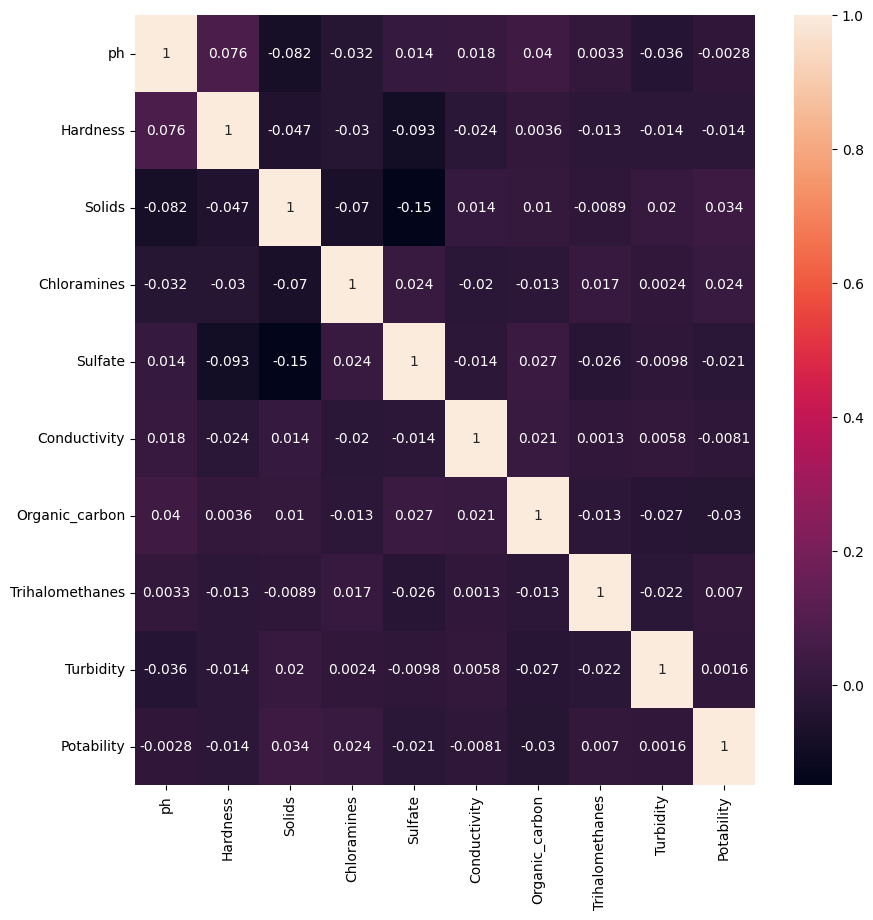

In [23]:
#hEAT MAP
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt=".2g")
plt.show()

Here, we can see that Solids is correlating well as per heatmap. Here in this map, potability is showing 0.034(highest positive value) with relation to Solids.

In [29]:
x = df.drop("Potability", axis=1)
y = df.Potability
X_train , X_test , y_train , y_test = train_test_split(x , y, test_size=0.25, random_state=42)

We analyze separately those waters that are potable and those that aren't.

In [15]:
df[df['Potability']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'])

,count,mean,std,min,25%,50%,75%,max
ph,1278.000000,7.063564,1.344194,0.227499,6.351824,7.000000,7.780068,13.175402
Hardness,1278.000000,195.800744,35.547041,47.432000,174.330531,196.632907,218.003420,323.124000
Solids,1278.000000,22383.991018,9101.010208,728.750830,15668.985035,21199.386614,27973.236446,56488.672413
Chloramines,1278.000000,7.169338,1.702988,0.352000,6.094134,7.215163,8.199261,13.127000
Sulfate,1278.000000,332.826749,41.868096,129.000000,313.052947,333.700000,354.807924,481.030642
Conductivity,1278.000000,425.383800,82.048446,201.619737,360.939023,420.712729,484.155911,695.369528
Organic_carbon,1278.000000,14.160893,3.263907,2.200000,12.033897,14.162809,16.356245,23.604298
Trihalomethanes,1278.000000,66.529369,15.972015,8.175876,56.911186,66.300000,77.067457,124.000000
Turbidity,1278.000000,3.968328,0.780842,1.492207,3.430909,3.958576,4.509569,6.494249
Potability,1278.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
df[df['Potability']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'])

,count,mean,std,min,25%,50%,75%,max
ph,1998.000000,7.071961,1.545801,0.000000,6.224046,7.000000,7.940697,14.000000
Hardness,1998.000000,196.733292,31.057540,98.452931,177.823265,197.123423,216.120687,304.235912
Solids,1998.000000,21777.490788,8543.068788,320.942611,15663.057382,20809.618280,27006.249009,61227.196008
Chloramines,1998.000000,7.092175,1.501045,1.683993,6.155640,7.090334,8.066462,12.653362
Sulfate,1998.000000,334.353192,31.944029,203.444521,319.354715,333.700000,348.316746,460.107069
Conductivity,1998.000000,426.730454,80.047317,181.483754,368.498530,422.229331,480.677198,753.342620
Organic_carbon,1998.000000,14.364335,3.334554,4.371899,12.101057,14.293508,16.649485,28.300000
Trihalomethanes,1998.000000,66.303365,15.642622,0.738000,56.441831,66.300000,76.518849,120.030077
Turbidity,1998.000000,3.965800,0.780282,1.450000,3.444062,3.948076,4.496106,6.739000
Potability,1998.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [17]:
x.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.068685,196.369496,22014.092526,7.122277,333.757711,426.205111,14.284970,66.391531,3.966786
std,1.470239,32.879761,8768.570828,1.583085,36.142627,80.824064,3.308162,15.769895,0.780382
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711
50%,7.000000,196.967627,20927.833607,7.130299,333.700000,421.884968,14.218338,66.300000,3.955028
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000


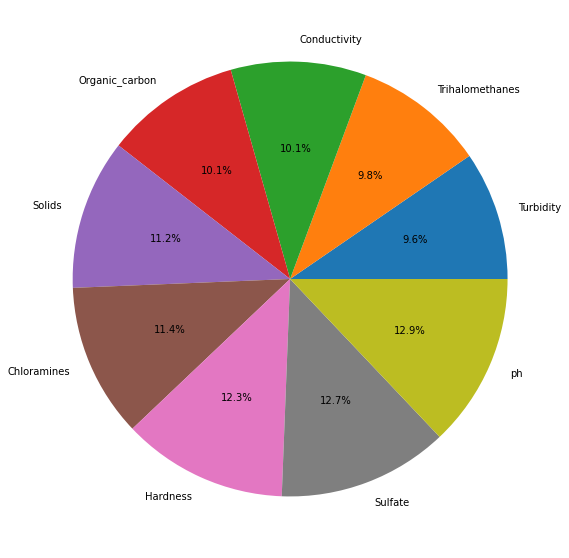

In [18]:
#Finding out the most important variables
clasification = RandomForestClassifier()
clasification.fit(x,y)

variables = x.columns
importance = pd.DataFrame()

importance['Features'] = variables
importance['Importance'] = clasification.feature_importances_
importance = importance.sort_values(by=['Importance'],ascending=True)

labels = importance['Features']
values = importance['Importance']

plt.figure(figsize=(10,10))
plt.pie(values, labels=labels,autopct='%0.1f%%')
plt.show()

In the pie chart we can see how the importance of each component is very similar to that of the others. It is visible that importance of each of the components is very similar to that of the others. That is why we have decided that there is no variable worth eliminating, since if we eliminate, for example, Turbidity there is no reason not to eliminate Conductivity or Solids as well since it is obvious that all of them have a very similar importance.

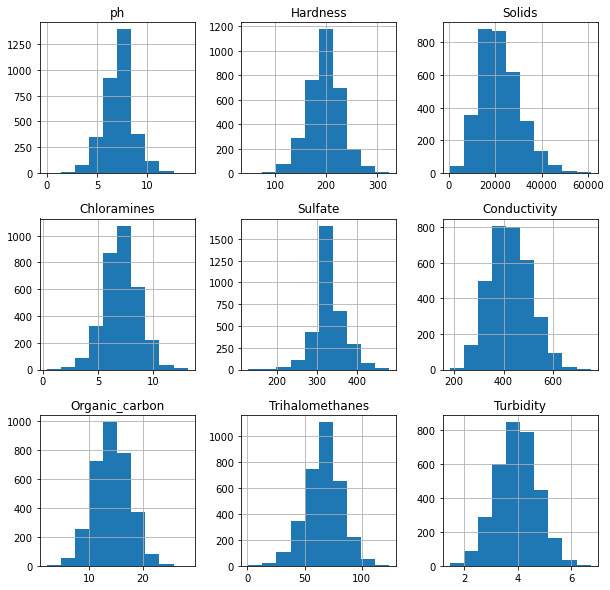

In [19]:
#Histograms
fig = plt.figure(figsize = (10,10))
var = df.drop("Potability", axis=1)
ax = fig.gca()
var.hist(ax=ax)
plt.show();

All features have a very similar distribution of their values. In addition, they all show a very gaussian form so there is no need to normalize any feature.

<AxesSubplot:xlabel='ph', ylabel='Count'>

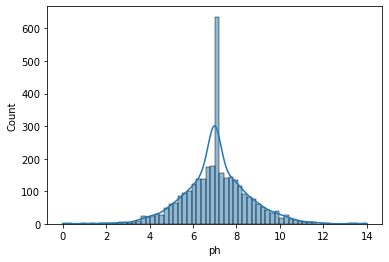

In [20]:
sns.histplot(df.ph,kde = True)

We represented the distribution of ph variable by counting the number of observations that fall within disrete bins.
We use kde parameter which if True, computes a kernel density estimate to smooth the distribution and show on the plot as (one or more) line(s) which is only relevant with univariate data.

In [21]:
df[['ph','Sulfate','Trihalomethanes']].describe().T

,count,mean,std,min,25%,50%,75%,max
ph,3276.0,7.068685,1.470239,0.000,6.277673,7.0,7.870050,14.000000
Sulfate,3276.0,333.757711,36.142627,129.000,317.094638,333.7,350.385756,481.030642
Trihalomethanes,3276.0,66.391531,15.769895,0.738,56.647656,66.3,76.666609,124.000000


<AxesSubplot:xlabel='ph', ylabel='Sulfate'>

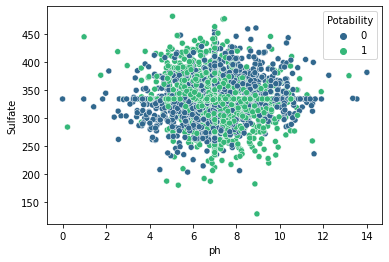

In [22]:
sns.scatterplot(data = df, x = "ph",y = "Sulfate",hue="Potability",palette="viridis")

<AxesSubplot:xlabel='ph', ylabel='Trihalomethanes'>

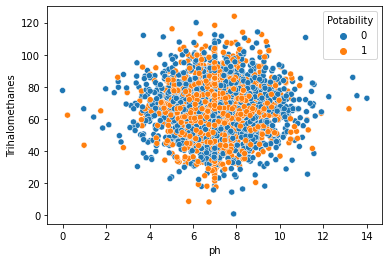

In [23]:
sns.scatterplot(data = df,x='ph',y="Trihalomethanes",hue="Potability")

<AxesSubplot:xlabel='Trihalomethanes', ylabel='Sulfate'>

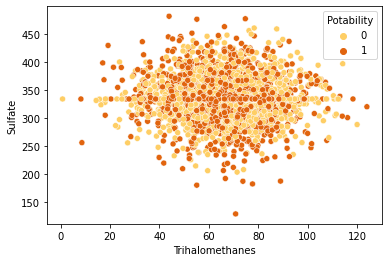

In [24]:
sns.scatterplot(data = df, x = "Trihalomethanes",y = "Sulfate",hue="Potability",palette="YlOrBr")

We use scatterplot to visualize and represent the values of two variables with 'Potability' as hue (which is a grouping variable). We divide data points into groups based on how closely the sets of points cluster together.

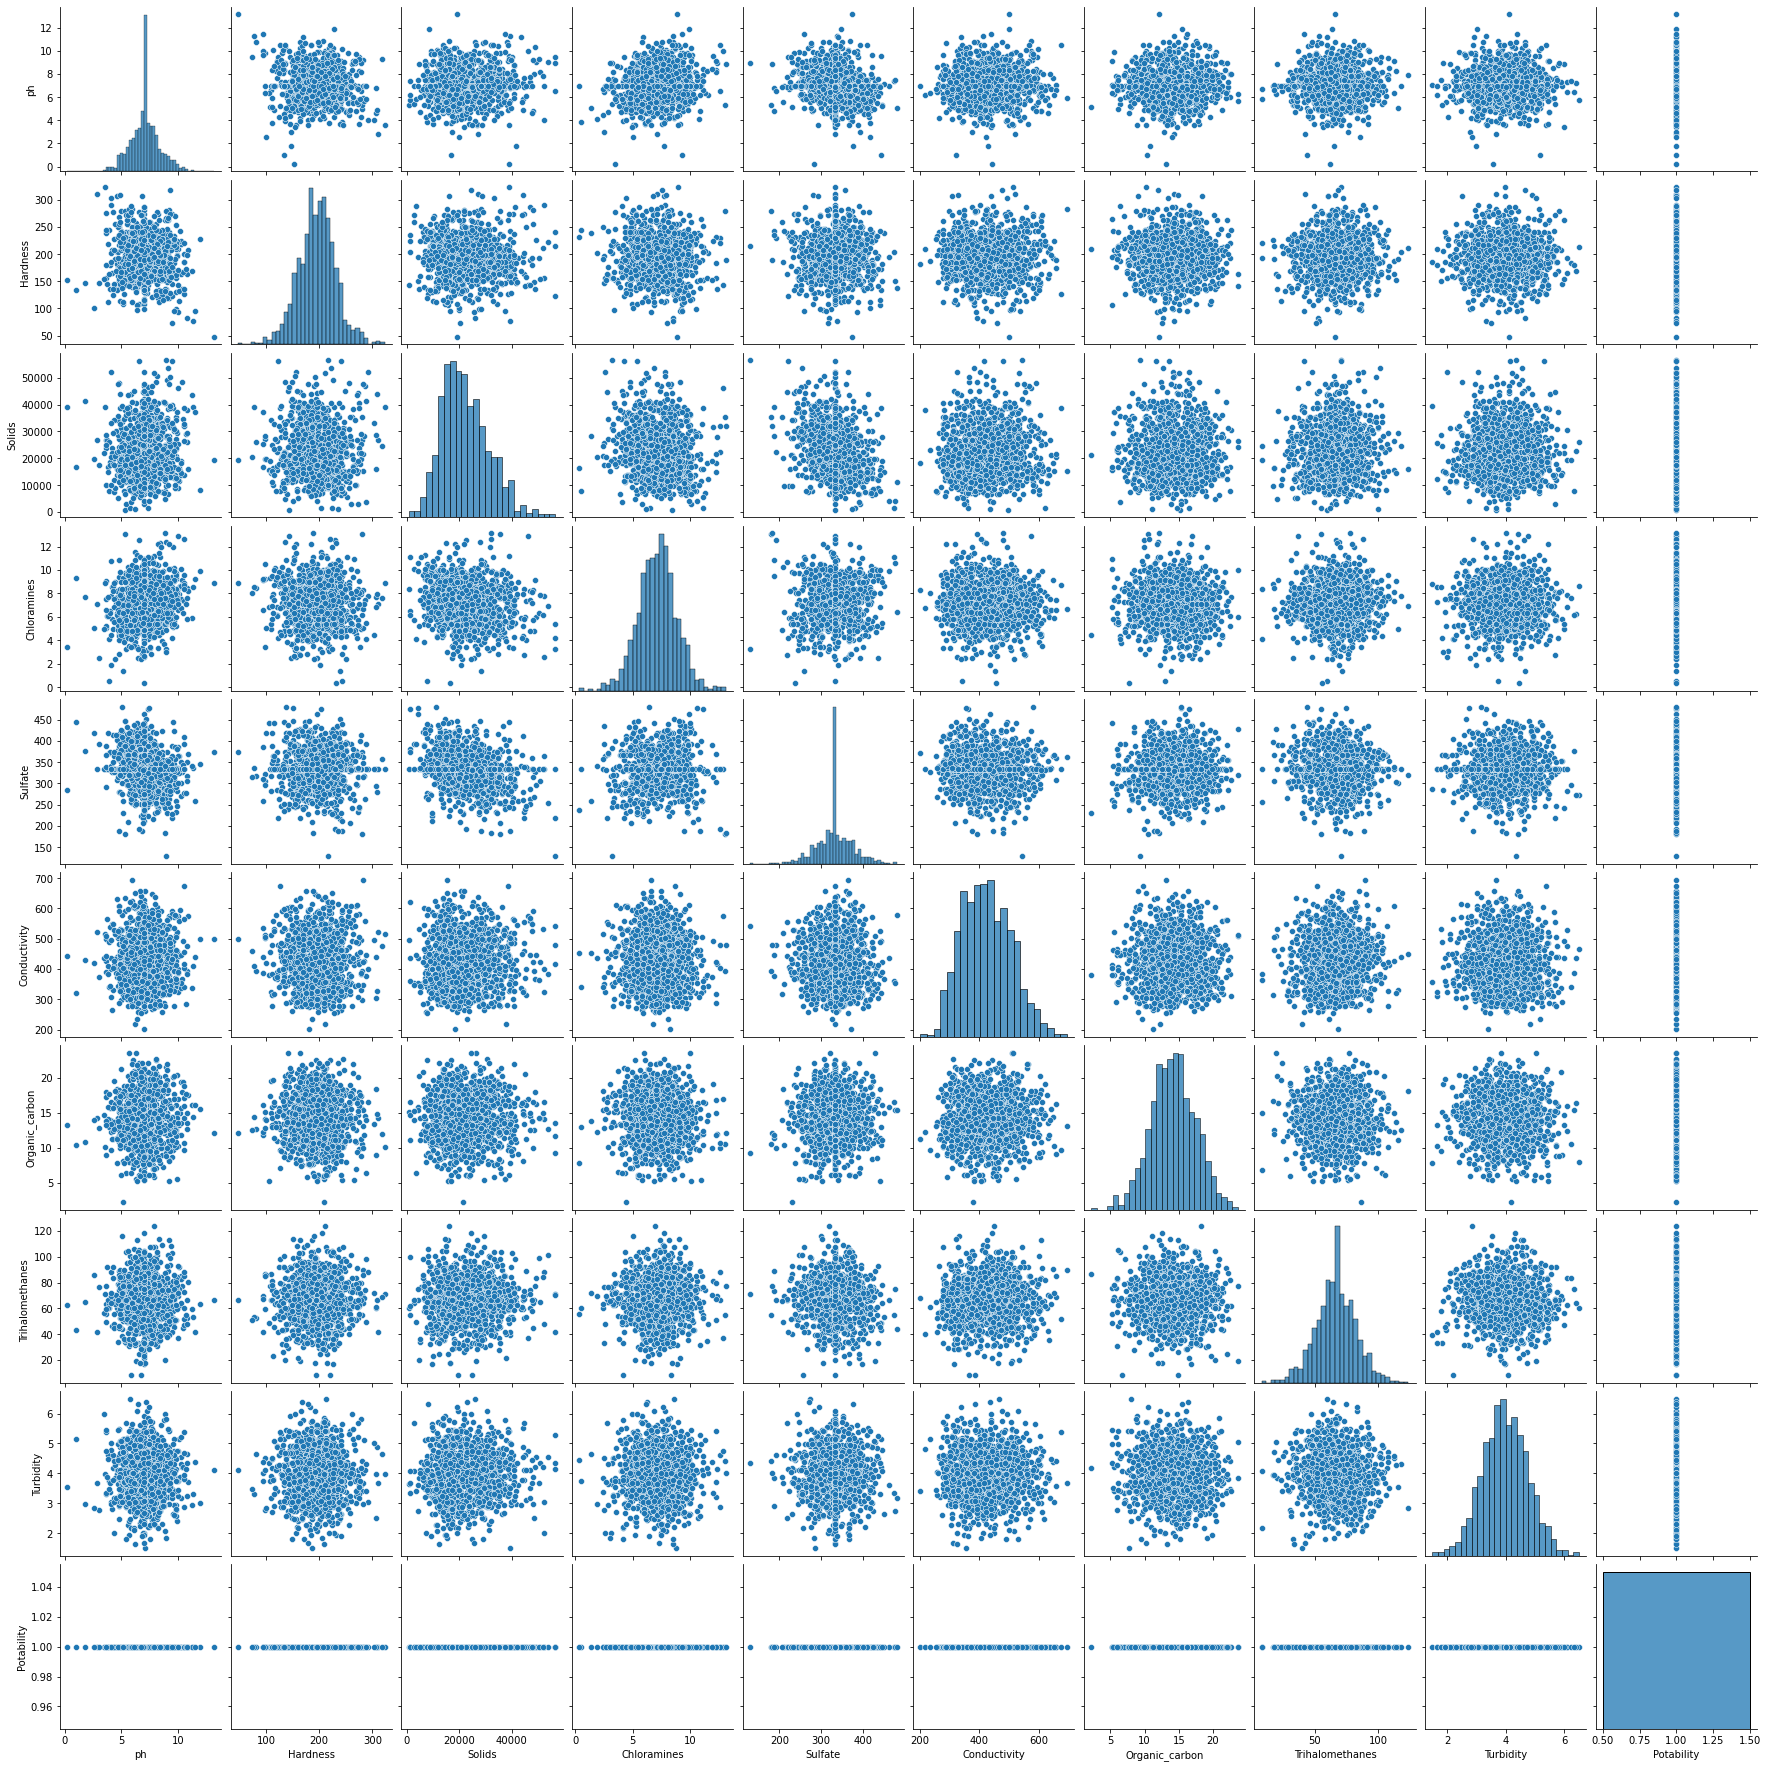

In [148]:
positive = df[df['Potability'] == 1]
sns.pairplot(positive)

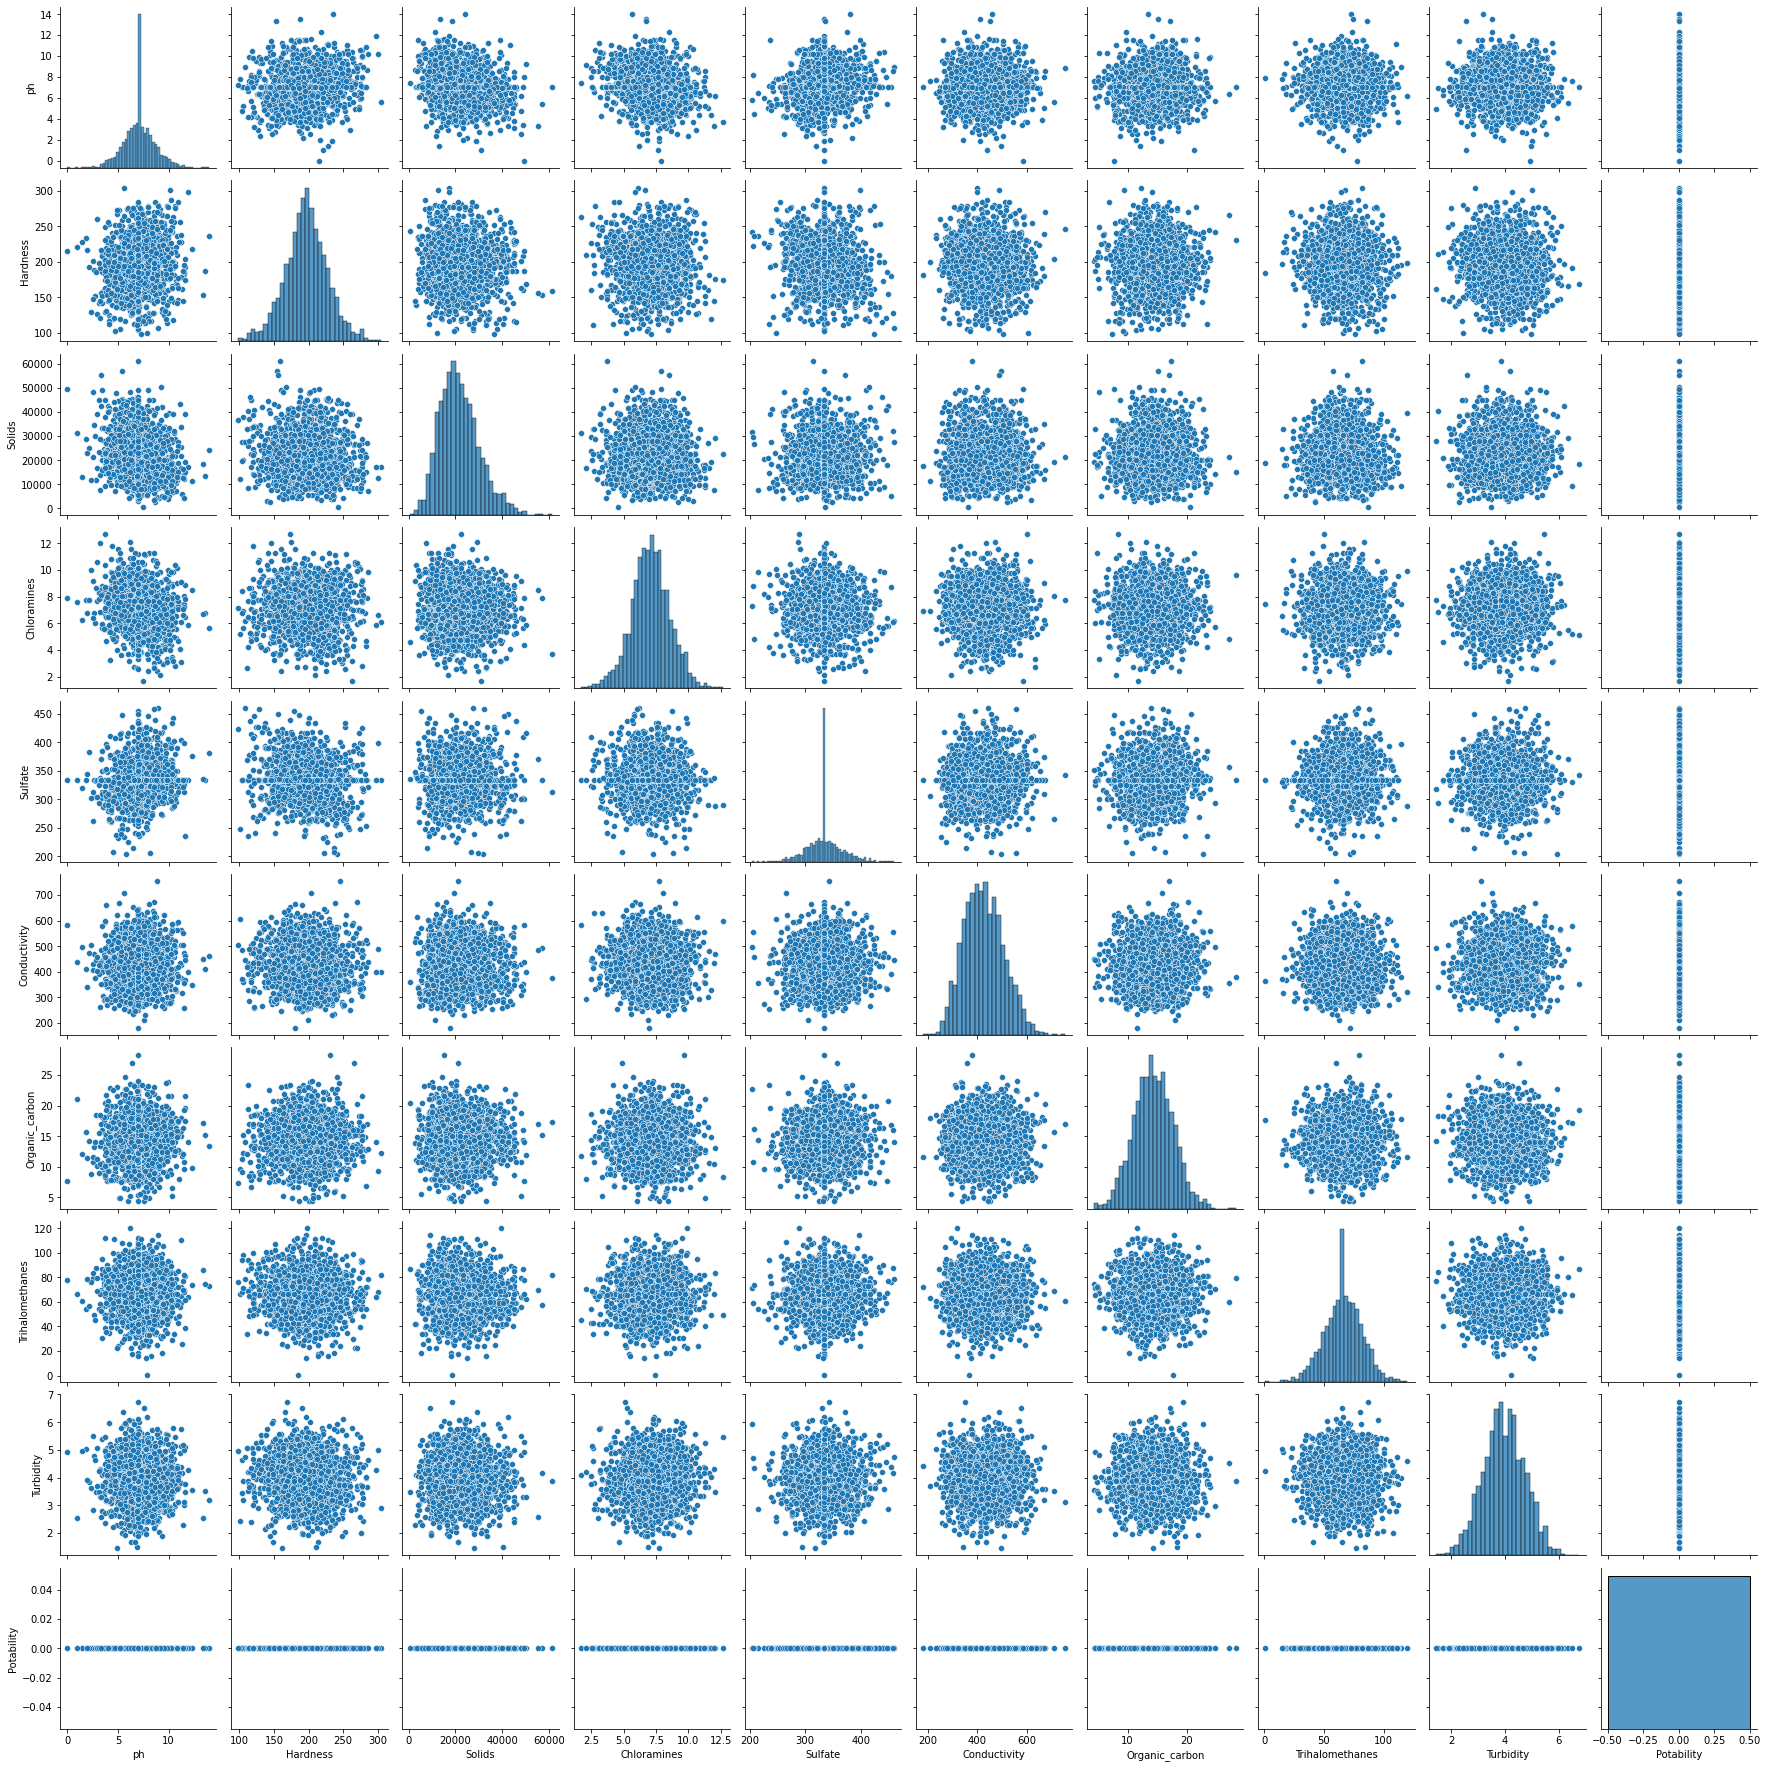

In [149]:
negative = df[df['Potability'] == 0]
sns.pairplot(negative)

Using pair plot we can see both the distribution of single variables and relationships between two variables.

# <center><font color='VIOLET'>ALGORITHMS</font>

## <font color='orange'>KNN IMPLEMENTATION

In [25]:
X = df.drop(['Potability'],axis=1)
Y = df['Potability']
X_stdscle = StandardScaler().fit_transform(X.values)

<b>Hyperparamter in KNN is</b> 
1) <b>k:</b> nearest neigbors which we compute while training the model. default:5<br> 
2) <b>p:</b> Power parameter for the minkowski metric. When p = 1, this is equivalent to using manhattan_distance,and euclidean_distance for p = 2.(default = 2)  <br>
3) <b>metric:</b> str or callable, default=’minkowski’.The distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric.

#### RESULT 1

In [26]:
#training the KNN model and predicting the classes
X_stdscle_df = pd.DataFrame(X_stdscle, index=X.index, columns=X.columns)
x_train, x_test, y_train, y_test = train_test_split(X_stdscle_df,Y,test_size=0.3, random_state =1)
knn_clf = KNeighborsClassifier(n_neighbors =5,p=2,metric='minkowski')
knn_clf.fit(x_train,y_train)

KNeighborsClassifier()

1) <b>k:</b> Here we have taken nearest neighbor as 5(default value).<br> 
2) <b>p:</b> Taken p=2 to find euclidean_distance (default value)<br>
3) <b>metric:</b> We have taken default=’minkowski’(default value)

In [27]:
#printing the accuracy and all other scores

print("Train Accuracy : ", 100*(round(accuracy_score(y_train,knn_clf.predict(x_train)),5)))
print("Test Accuracy : ", 100*(round(accuracy_score(y_test,knn_clf.predict(x_test)),5)))
result = confusion_matrix(y_test, knn_clf.predict(x_test))
print("Confusion Matrix:")
print(result)
print("Classification Report : \n", classification_report(y_test, knn_clf.predict(x_test)))

Train Accuracy :  75.578
Test Accuracy :  61.546
Confusion Matrix:
[[437 148]
 [230 168]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.66      0.75      0.70       585
           1       0.53      0.42      0.47       398

    accuracy                           0.62       983
   macro avg       0.59      0.58      0.58       983
weighted avg       0.61      0.62      0.61       983



#### RESULT 2

In [28]:
#training the KNN model and predicting the classes
X_stdscle_df = pd.DataFrame(X_stdscle, index=X.index, columns=X.columns)
x_train, x_test, y_train, y_test = train_test_split(X_stdscle_df,Y,test_size=0.3, random_state =1)
knn_clf = KNeighborsClassifier(n_neighbors = 3,p=2,metric='minkowski')
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

1) <b>k:</b> Here we have taken nearest neighbor as 3.<br> 
2) <b>p:</b> Taken p=2 to find euclidean_distance<br>
3) <b>metric:</b> We have taken default=’minkowski’

In [29]:
#printing the accuracy and all other scores
print("Train Accuracy : ", 100*(round(accuracy_score(y_train,knn_clf.predict(x_train)),5)))
print("Test Accuracy : ", 100*(round(accuracy_score(y_test,knn_clf.predict(x_test)),5)))
result = confusion_matrix(y_test, knn_clf.predict(x_test))
print("Confusion Matrix:")
print(result)
print("Classification Report : \n", classification_report(y_test, knn_clf.predict(x_test)))

Train Accuracy :  81.204
Test Accuracy :  61.546
Confusion Matrix:
[[421 164]
 [214 184]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.66      0.72      0.69       585
           1       0.53      0.46      0.49       398

    accuracy                           0.62       983
   macro avg       0.60      0.59      0.59       983
weighted avg       0.61      0.62      0.61       983



#### RESULT 3

In [30]:
#training the KNN model and predicting the classes
X_stdscle_df = pd.DataFrame(X_stdscle, index=X.index, columns=X.columns)
x_train, x_test, y_train, y_test = train_test_split(X_stdscle_df,Y,test_size=0.3, random_state =1)
knn_clf = KNeighborsClassifier(n_neighbors = 2,p=1,metric='minkowski')
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2, p=1)

1) <b>k:</b> Here we have taken nearest neighbor as 2.<br> 
2) <b>p:</b> Taken p=1 to find manhattan_distance<br>
3) <b>metric:</b> We have taken default=’minkowski’

In [31]:
#printing the accuracy and all other scores

print("Train Accuracy : ", 100*(round(accuracy_score(y_train,knn_clf.predict(x_train)),5)))
print("Test Accuracy : ", 100*(round(accuracy_score(y_test,knn_clf.predict(x_test)),5)))
result = confusion_matrix(y_test, knn_clf.predict(x_test))
print("Confusion Matrix:")
print(result)
print("Classification Report : \n", classification_report(y_test, knn_clf.predict(x_test)))

Train Accuracy :  79.459
Test Accuracy :  62.05500000000001
Confusion Matrix:
[[512  73]
 [300  98]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.63      0.88      0.73       585
           1       0.57      0.25      0.34       398

    accuracy                           0.62       983
   macro avg       0.60      0.56      0.54       983
weighted avg       0.61      0.62      0.58       983



<table style="width:80%">
    <tr>
        <th  style='text-align:center'>Parameters</th>
        <th  style='text-align:center'>Accuracy</th>
    </tr>
    <tr>
        <td  style='text-align:center'>k:5,p:2</td>
        <td  style='text-align:center'>Train: 75.578 , Test:61.546 </td>
    </tr>
    <tr>
        <td  style='text-align:center'>k:3,p:2</td>
        <td  style='text-align:center'>Train: 75.578 , Test:61.546 </td>
    </tr>
    <tr>
        <td  style='text-align:center'>k:5,p:1</td>
        <td  style='text-align:center'>Train: 79.459 , Test: 62.055</td>
    </tr>

In [32]:
#MSE
from sklearn.metrics import mean_squared_error
print("MSE:",mean_squared_error(y_test, knn_clf.predict(x_test)))

# RMSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, knn_clf.predict(x_test))))

#MAE
from sklearn.metrics import mean_absolute_error
print("MAE:",mean_absolute_error(y_test, knn_clf.predict(x_test)))

#R2
from sklearn.metrics import r2_score 
print("R2:",r2_score(y_test, knn_clf.predict(x_test)))

MSE: 0.37945066124109866
RMSE: 0.6159956665765586
MAE: 0.37945066124109866
R2: -0.5747927672550794


Text(33.0, 0.5, 'Prediction Label')

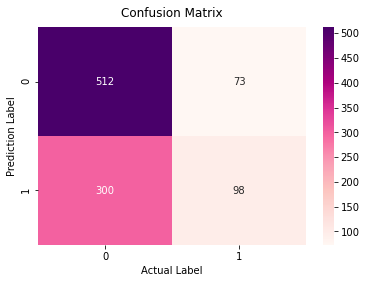

In [33]:
sns.heatmap(data=confusion_matrix(y_test, knn_clf.predict(x_test)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

Text(33.0, 0.5, 'Prediction Label')

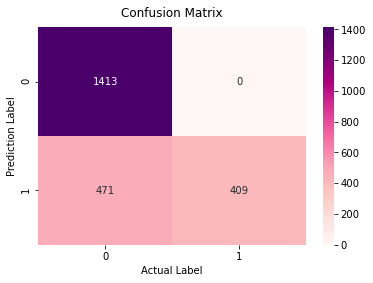

In [34]:
sns.heatmap(data=confusion_matrix(y_train, knn_clf.predict(x_train)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

## <font color='orange'> DECISION TREE IMPLEMENTATION

<b>Hyperparamter in Decision Tree is</b> 
1) <b>criterion: </b> The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. (default='gini')<br> 
2) <b>max_depth: </b>Max_depth is one of the most important parameters is max_depth. It captures the essence of how deep the tree can get. More depth in the tree means that it is able to extract more information from the features. However, sometimes, excessive depth might be a cause of worry as it tends to bring along overfitting as well.(default = 'None')<br>
3) <b>splitter: </b>The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.(default='best') 

#### RESULT 1

In [35]:
# Create Decision tree classifier object
clf = DecisionTreeClassifier(criterion='entropy',max_depth=3,splitter='best')

# Train Decision Tree Classifier 
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
acc_decision_tree = round(clf.score(x_train, y_train) * 100, 2)

#Model Accuracy, how often is the classifier correct?
print("Train accuracy:",acc_decision_tree)
print("Test Accuracy:", 100*(metrics.accuracy_score(y_test, y_pred)))

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
print("Classification Report : \n", classification_report(y_test, y_pred))

Train accuracy: 66.68
Test Accuracy: 62.970498474059
Confusion Matrix:
[[546  39]
 [325  73]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.63      0.93      0.75       585
           1       0.65      0.18      0.29       398

    accuracy                           0.63       983
   macro avg       0.64      0.56      0.52       983
weighted avg       0.64      0.63      0.56       983



#### RESULT 2

In [36]:
# Create Decision tree classifier object
clf = DecisionTreeClassifier(criterion='entropy',max_depth=12,splitter='random')

# Train Decision Tree Classifier 
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
acc_decision_tree = round(clf.score(x_train, y_train) * 100, 2)

#Model Accuracy, how often is the classifier correct?
print("Train accuracy:",acc_decision_tree)
print("Test Accuracy:", 100*(metrics.accuracy_score(y_test, y_pred)))

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
print("Classification Report : \n", classification_report(y_test, y_pred))

Train accuracy: 72.92
Test Accuracy: 60.93591047812817
Confusion Matrix:
[[517  68]
 [316  82]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.62      0.88      0.73       585
           1       0.55      0.21      0.30       398

    accuracy                           0.61       983
   macro avg       0.58      0.54      0.51       983
weighted avg       0.59      0.61      0.56       983



#### RESULT 3

In [37]:
# Create Decision tree classifier object
clf = DecisionTreeClassifier(criterion='entropy',max_depth=12,splitter='best')

# Train Decision Tree Classifier 
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
acc_decision_tree = round(clf.score(x_train, y_train) * 100, 2)

#Model Accuracy, how often is the classifier correct?
print("Train accuracy:",acc_decision_tree)
print("Test Accuracy:", 100*(metrics.accuracy_score(y_test, y_pred)))

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
print("Classification Report : \n", classification_report(y_test, y_pred))

Train accuracy: 78.63
Test Accuracy: 63.47914547304171
Confusion Matrix:
[[524  61]
 [298 100]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.64      0.90      0.74       585
           1       0.62      0.25      0.36       398

    accuracy                           0.63       983
   macro avg       0.63      0.57      0.55       983
weighted avg       0.63      0.63      0.59       983



<table style="width:80%">
    <tr>
        <th  style='text-align:center'>Parameters</th>
        <th  style='text-align:center'>Accuracy</th>
    </tr>
    <tr>
        <td  style='text-align:center'>criterion:entropy,max_depth:3,splitter:best</td>
        <td  style='text-align:center'>Train: 66.68 , Test:62.9705 </td>
    </tr>
    <tr>
        <td  style='text-align:center'>criterion:entropy,max_depth:12,splitter:random</td>
        <td  style='text-align:center'>Train: 72.13 , Test:62.4618 </td>
    </tr>
    <tr>
        <td  style='text-align:center'>criterion:entropy,max_depth:12,splitter:best</td>
        <td  style='text-align:center'>Train: 78.59 , Test: 63.5808</td>
    </tr>

In [38]:
#MSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))

#R2
from sklearn.metrics import r2_score 
print(r2_score(y_test,y_pred))

0.3652085452695829
0.6043248673268236
0.3652085452695829
-0.5156852639264704


Text(33.0, 0.5, 'Prediction Label')

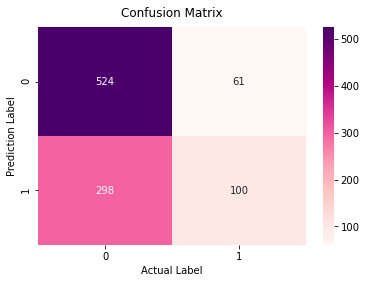

In [39]:
sns.heatmap(data=confusion_matrix(y_test, clf.predict(x_test)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

Text(33.0, 0.5, 'Prediction Label')

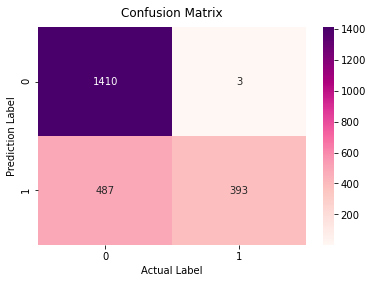

In [40]:
sns.heatmap(data=confusion_matrix(y_train, clf.predict(x_train)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

66.68120366332315
62.970498474059


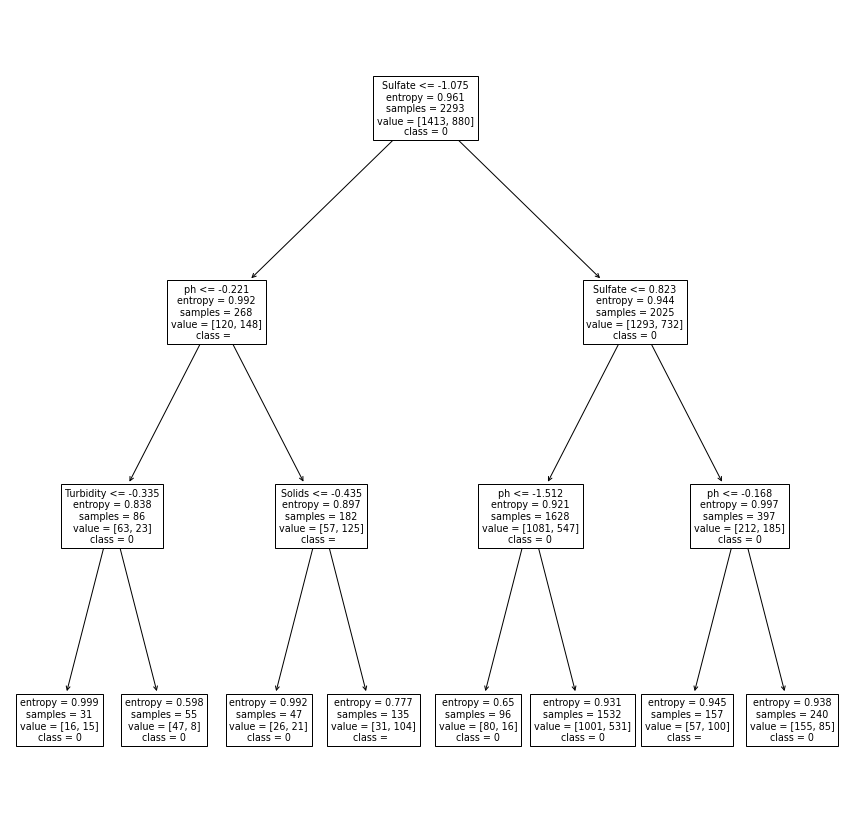

In [41]:
model = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train, y_train)
print(metrics.accuracy_score(y_train, model.predict(x_train)) * 100)
print(metrics.accuracy_score(y_test, model.predict(x_test)) * 100)

fig, ax = plt.subplots(1, 1, figsize = (15, 15))
#x_aux = pd.DataFrame(x)
tree.plot_tree(model, impurity = True, class_names = str(Y),feature_names = X.columns);

### RANDOM FOREST IMPLEMENTATION

<b>Hyperparamter in Random Forest is</b> 
1) <b>criterion: </b> The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. (default='gini')<br> 
2) <b>max_depth: </b>Max_depth is one of the most important parameters is max_depth. It captures the essence of how deep the tree can get. More depth in the tree means that it is able to extract more information from the features. However, sometimes, excessive depth might be a cause of worry as it tends to bring along overfitting as well.(default = 'None')<br>
3) <b>n_estimators: </b>n_estimators is the parameter used here to predict accuracy, it is the number of trees in the foreset.(default = 100) 

#### RESULT 1

In [42]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 150,criterion='entropy',max_depth = 10)
classifier.fit(x_train, y_train)
rf_pred = classifier.predict(x_test)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, rf_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,rf_pred)*100
print("Accuracy:",result2)

Confusion Matrix:
[[551  34]
 [315  83]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.94      0.76       585
           1       0.71      0.21      0.32       398

    accuracy                           0.64       983
   macro avg       0.67      0.58      0.54       983
weighted avg       0.67      0.64      0.58       983

Accuracy: 64.49643947100712


#### RESULT 2

In [44]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 500,criterion='entropy',max_depth = 8)
classifier.fit(x_train, y_train)
rf_pred = classifier.predict(x_test)

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, rf_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,rf_pred)*100
print("Accuracy:",result2)

Confusion Matrix:
[[553  32]
 [321  77]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.95      0.76       585
           1       0.71      0.19      0.30       398

    accuracy                           0.64       983
   macro avg       0.67      0.57      0.53       983
weighted avg       0.66      0.64      0.57       983

Accuracy: 64.08952187182095


#### RESULT 3

In [46]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100,criterion='entropy',max_depth = None)
classifier.fit(x_train, y_train)
rf_pred = classifier.predict(x_test)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, rf_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,rf_pred)*100
print("Accuracy:",result2)

Confusion Matrix:
[[520  65]
 [278 120]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.89      0.75       585
           1       0.65      0.30      0.41       398

    accuracy                           0.65       983
   macro avg       0.65      0.60      0.58       983
weighted avg       0.65      0.65      0.61       983

Accuracy: 65.10681586978637


<table style="width:80%">
    <tr>
        <th  style='text-align:center'>Parameters</th>
        <th  style='text-align:center'>Accuracy</th>
    </tr>
    <tr>
        <td  style='text-align:center'>criterion:entropy,max_depth:10,n_estimators:150</td>
        <td  style='text-align:center'>63.6826</td>
    </tr>
    <tr>
        <td  style='text-align:center'>criterion:entropy,max_depth:8,n_estimators:500</td>
        <td  style='text-align:center'>64.3947</td>
    </tr>
    <tr>
        <td  style='text-align:center'>criterion:entropy,max_depth:None,n_estimators:100</td>
        <td  style='text-align:center'>66.429</td>
    </tr>

In [48]:
#MSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, rf_pred))

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))

#MAE
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, rf_pred))

#R2
from sklearn.metrics import r2_score 
print(r2_score(y_test,rf_pred))

0.34893184130213634
0.590704529610309
0.34893184130213634
-0.44813383155091735


Text(33.0, 0.5, 'Prediction Label')

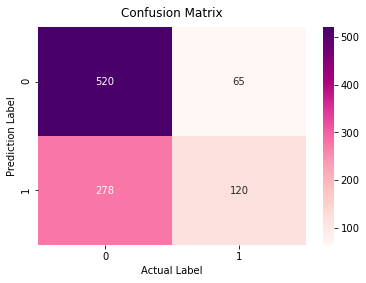

In [49]:
sns.heatmap(data=confusion_matrix(y_test, classifier.predict(x_test)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

Text(33.0, 0.5, 'Prediction Label')

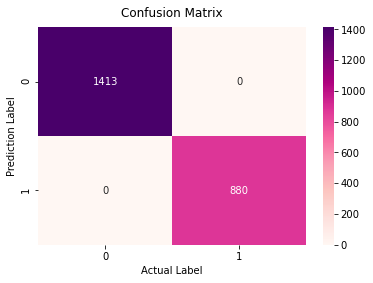

In [50]:
sns.heatmap(data=confusion_matrix(y_train, classifier.predict(x_train)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

In [51]:
importances=pd.DataFrame({'feature':X_train.columns,'importance':np.round(classifier.feature_importances_,3)})
importances=importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(100)

,importance
feature,
ph,0.131
Hardness,0.122
Chloramines,0.115
Sulfate,0.115
Solids,0.112
Conductivity,0.103
Organic_carbon,0.101
Turbidity,0.101
Trihalomethanes,0.100


<AxesSubplot:xlabel='feature'>

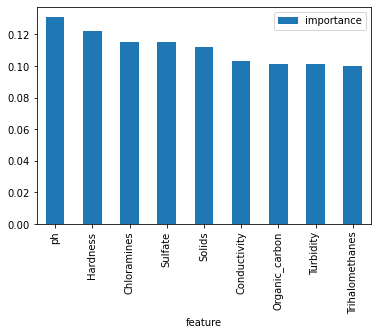

In [52]:
importances.plot.bar()